# First steps

Make sure to install all libraries used below. For a list of the packages, read requirements.txt in the root directory.

Or simply run the following command:
`pip install -r requirements.txt`

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Downloading the dataset
Head over to the [sharepoint](https://tuenl-my.sharepoint.com/:f:/g/personal/v_menkovski_tue_nl/Ev0K8FjnvWVOsWsToeeCIPoBhJz3I4RCEsIAz-eYGjPxqg?e=pa63eJ), where you will find a zip file `spherical-harmonics-dataset.zip` containing the full dataset.

Download this file, and extract it in your data/ folder.

Now, your data/ directory should have the following structure:

    data/                               
        bubbles_stl/                    
        pickle_files_FT/                
        pickle_files_image/             
        renders/                        
        validation/                     

<img src="../figures/bubble_simulation.gif" width=600px/>

<img src="../figures/bubble_positions.png" width=600px/>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/bb/2D_Wave_Function_resize.gif" width=400px>

Figures 1-3

# Spherical Harmonics 

## What are spherical harmonics?
Similar to how we can define functions on a plane (Figure 3), we can also define functions on the [surface of a sphere](https://upload.wikimedia.org/wikipedia/commons/1/12/Rotating_spherical_harmonics.gif). The latter are _Spherical Harmonics_, and are more common than you may think. They are used to model the magnetic fields of planets and stars, gravitational fields, and electron configurations to name a few. 

<img src="https://image.slidesharecdn.com/bubblecolumnreactor-180224063729/85/Bubble-column-reactor-5-320.jpg" width="600px">

Figure 4: Bubble column reactor

## Bubble simulations
Bubble column reactors, like the one shown in Figure 4, are multiphase reactors consisting of a vertical cylindrical column filled with a liquid and a gas distributor. 

The gas flow rate is introduced at the bottom of the column. This will create bubbles, which vertically ascend through the liquid. As they rise, the bubbles deform in space! 

Spherical harmonics are used to accurately model the bubble deformations. 

## Your research
Bubble columns are extensively used in many industrial applications. High-fidelity numerical simulators are used to simulate bubble columns' spherical harmonics, with great accuracy. The major downside of this method is that they are computationally expensive, sometimes taking multiple days for a single simulation. As a result, there is a large demand for faster surrogate models.

We are looking to build a probabilistic emulator (with parameters $\theta$), that can learn the conditional distribution $P_\theta(X^{t+1}|X^t)$. This emulator should still obtain good accuracy, but much faster than the high-fidelity simulator - thus striking a better balance between accuracy and (time-)complexity.

$X^t$ represents the state of the system at time $t$, this consists of the positions of all the bubbles, the velocities of the bubbles,  the spherical harmonics values for each orbital, and the velocities of the spherical harmonics.


## The data
The dataset consists of simulations of 32 bubbles, over 13 timesteps. An animation of such a simulation is shown above (Figure 1).

We are interested in the interplay between the spherical harmonics of each bubble and their movement over time (Figure 2). 

- Each bubble tracked over time, the following attributes are stored at each timestep t
    - id: The identifier is used to easily select the simulation of a single bubble. 
    - stl: The stl column contains the relative location of the associated stl file. The stl files were used to compute the orbital weights (orbs).
    - sim: Used to easily select a simulation type. The Xmm indicates the bubble diameter and the epsXX the gas holdup value.
    - bub_num: Indicates the bubble number within a certain simulation. Each simulation contains 32 bubbles.
    - time [s]: Time step in seconds.
    - pos [x, y, z]: Gives the center of origin of the stl mesh. There are separate columns for the x, y and z position.
    - velocity [x, y, z]: The current velocity of each bubble, in [x, y, z] direction.
    - orbs: Contains the spherical harmonics scalar values for each orbital used. Multiplying each orbital with the respective scalar value followed by summing all orbitals results in the 3D representation of the stl mesh. The number of orbitals used is set to 225, which corresponds to an l-max value of 14: num_orbs = (l_max + 1)**2.
    - orbs velocity: The velocity of the spherical harmonics. You can think of this as how fast the bubble is deforming.

---

### NOTE: The orb velocities are not yet in the current dataset. 
We are working on a fix, you will have the updated SURFdrive link ASAP - so make sure you read the Teams channel.

---

### Getting started
Note that since the data is essentially a table, we can read it using pandas! 

For example, if we only want to view bubble #0 we can run the following cell:

In [11]:
df = pd.read_pickle("../data/bubble/bubble.pkl")

# Add columns for orbitals from 16 to 225, all with 0 values
for i in range(16, 225):
    df[f"orb_{i}"] = 0.0

# save the updated dataframe
df.to_pickle("../data/bubble/bubble.pkl")

bubble0_df = df.loc[df["bub_num"] == 0]
bubble0_df.head()

/var/folders/rb/wmrnk95s19s54kfvkb8zgwcm0000gn/T/ipykernel_46981/3141118599.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"orb_{i}"] = 0.0
/var/folders/rb/wmrnk95s19s54kfvkb8zgwcm0000gn/T/ipykernel_46981/3141118599.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"orb_{i}"] = 0.0
/var/folders/rb/wmrnk95s19s54kfvkb8zgwcm0000gn/T/ipykernel_46981/3141118599.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Conside

,id,sim,eps,r_bub,bub_num,time [s],pos_x,pos_y,pos_z,vel_x,...,orb_215,orb_216,orb_217,orb_218,orb_219,orb_220,orb_221,orb_222,orb_223,orb_224
0,FT_32x4mm-airwater-eps15_0,FT_32x4mm-airwater-eps15,0.15,0.002,0,2.67,0.004227,0.011090,0.007389,-0.035570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,FT_32x4mm-airwater-eps15_0,FT_32x4mm-airwater-eps15,0.15,0.002,0,2.68,0.003871,0.010881,0.008204,-0.091619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,FT_32x4mm-airwater-eps15_0,FT_32x4mm-airwater-eps15,0.15,0.002,0,2.69,0.002955,0.010647,0.009401,-0.076678,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,FT_32x4mm-airwater-eps15_0,FT_32x4mm-airwater-eps15,0.15,0.002,0,2.70,0.002188,0.010787,0.011399,-0.111043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128,FT_32x4mm-airwater-eps15_0,FT_32x4mm-airwater-eps15,0.15,0.002,0,2.71,0.001078,0.010963,0.013376,-0.044252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, if we want to show the trajectory of this bubble over time, we can do the following:

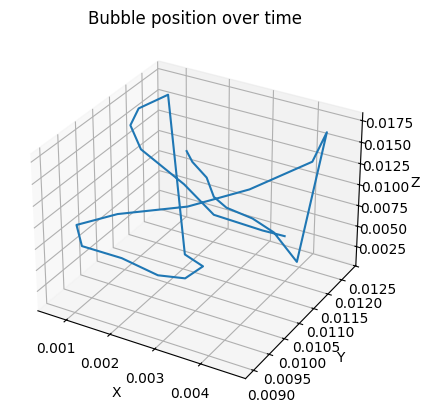

In [12]:
# Get the position values
pos = bubble0_df[["pos_x", "pos_y", "pos_z"]].values

# Make plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot(pos[:, 0], pos[:, 1], pos[:, 2])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Bubble position over time")
plt.show()

Additionally, we can generate the following plots using some plotting functions from `src/utils/read_data.py`

NOTE: if your jupyter notebook does not show animations, you can find a saved copy of each visualization in the `figures/` directory after running the entire notebook.

In [29]:
import numpy as np
import pyvista as pv
from utils.sph_harm_functions import stl_maker

# Dato un array di 225 coefficienti delle armoniche sferiche (pesi)
# Sostituisci questo array con i tuoi dati reali
weights = np.random.randn(225)  # Coefficienti dati delle armoniche sferiche
print(weights.shape)

orbs_columns = [f"orb_{i}" for i in range(0, 225)]
weights = bubble0_df[orbs_columns].values[-1]
print(weights.shape)

# Parametri della griglia
grid = [100, 100]  # Griglia per la discretizzazione, puoi modificare la risoluzione

# Usa la funzione stl_maker per generare il modello 3D della bolla
stl_model = stl_maker(weights, grid)

# Visualizza il modello 3D con PyVista
pl = pv.Plotter()
pl.add_mesh(stl_model, color="magenta", show_edges=True)
pl.add_axes()
pl.show()

# Salva il modello come file STL, se desiderato
stl_model.save("bubble_model.stl")
print("Modello STL della bolla salvato come 'bubble_model.stl'")

(225,)
(225,)


Widget(value='<iframe src="http://localhost:59551/index.html?ui=P_0x3036b4ad0_12&reconnect=auto" class="pyvist…

Modello STL della bolla salvato come 'bubble_model.stl'


In [27]:
import os
from utils.read_data import bubble

dir = os.path.join("../data", "bubble")
save = True  # Save the plots
orbs_to_show = range(0, 5)  # Select the orbs to show

# Create a bubble object, which will read in all simulations (.pkl files) from directory data/pickle_files_FT/
b = bubble(dir, save)

b.display_bubble(
    0
)  # Displays a single bubble at a certain timestep to compare the ground truth with the spherical harmonics

KeyError: 'stl'

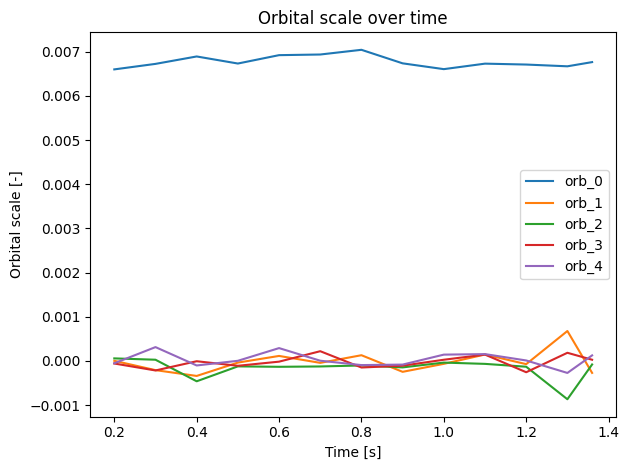

In [7]:
b.display_orbs(
    0, orbs_to_show
)  # Displays the orbital weights over time for a single bubble

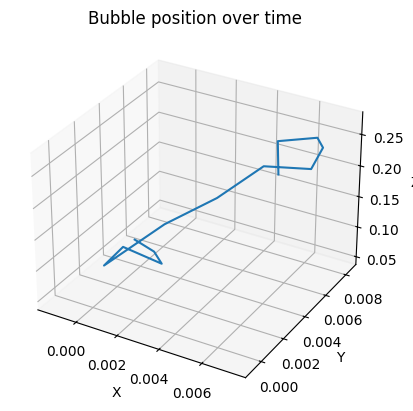

In [8]:
b.display_trajectory(0)  # Displays the position of a single bubble over time

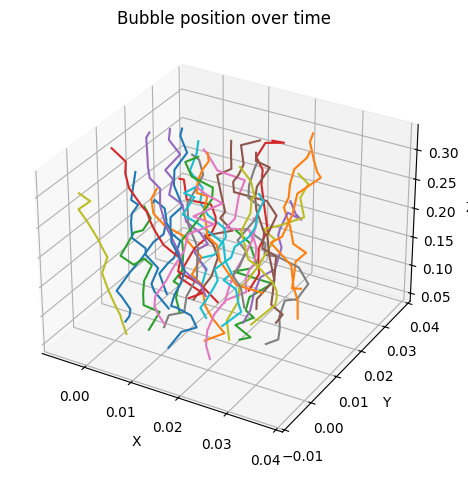

In [9]:
b.display_trajectories(0)  # Displays the position of a simulation over time

In [10]:
b.display_shape(0)  # Displays the shape of a single bubble over time

Widget(value='<iframe src="http://localhost:54707/index.html?ui=P_0x167709cd0_1&reconnect=auto" class="pyvista…

In [11]:
b.display_simulation(0)  # Displays the simulation of all bubbles over time

Widget(value='<iframe src="http://localhost:54707/index.html?ui=P_0x1678983e0_1&reconnect=auto" class="pyvista…

The rest is up to you, good luck :)